In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")


In [ ]:
df=pd.read_csv('/content/Assignment-1_Data.csv',sep=';')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df.head(3)

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010 08:26,"2,55",17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01.12.2010 08:26,"2,75",17850.0,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   BillNo      522064 non-null  object 
 1   Itemname    520609 non-null  object 
 2   Quantity    522064 non-null  int64  
 3   Date        522064 non-null  object 
 4   Price       522064 non-null  object 
 5   CustomerID  388023 non-null  float64
 6   Country     522064 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 27.9+ MB


In [ ]:
df['Price']=df['Price'].str.replace(",",".")

In [ ]:
df['Price']=df['Price'].astype("float64")

In [ ]:
df.dtypes

BillNo         object
Itemname       object
Quantity        int64
Date           object
Price         float64
CustomerID    float64
Country        object
dtype: object

In [ ]:

#Recency, Frequency and Monetary modelling



rec = df.groupby(["CustomerID"]).agg({"Date": lambda x: ((today - x.max()).days)})
rec.columns = ["Recency"]

In [ ]:
rec.head(4)

,Recency
CustomerID,
12346.0,347
12347.0,61
12349.0,40
12350.0,332


In [ ]:
freq = df.drop_duplicates(subset = "BillNo").groupby(["CustomerID"])[["BillNo"]].count()
freq.columns = ["Frequency"]
freq.head()

,Frequency
CustomerID,
12346.0,1
12347.0,7
12349.0,1
12350.0,1
12352.0,8


In [ ]:
#monetary values



df["Total"]=df["Quantity"]*df["Price"]

In [ ]:
money = df.groupby(["CustomerID"])[["Total"]].sum()
money.columns = ["Monetary"]
money.head()

,Monetary
CustomerID,
12346.0,77183.60
12347.0,4310.00
12349.0,1757.55
12350.0,334.40
12352.0,2506.04


In [ ]:
RFM=pd.concat([rec,freq,money],axis=1)

In [ ]:
RFM.head(10)

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,347,1,77183.60
12347.0,61,7,4310.00
12349.0,40,1,1757.55
12350.0,332,1,334.40
12352.0,94,8,2506.04
12353.0,226,1,89.00
12354.0,254,1,1079.40
12355.0,117,1,459.40
12356.0,44,3,2811.43


In [ ]:


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(RFM)



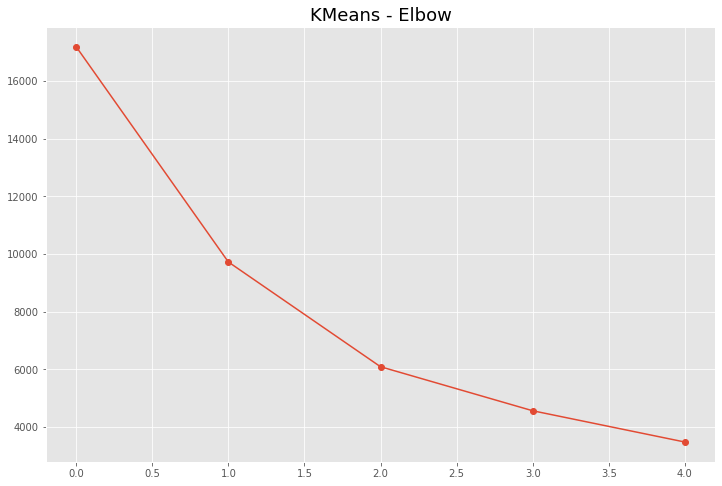

In [ ]:
inertia = []

from sklearn.cluster import KMeans
for i in np.arange(1,6):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize = (12,8))    
plt.plot(inertia, marker = "o")
plt.title("KMeans - Elbow", fontsize = 18);

In [ ]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(scaled)
RFM["Cluster_No"] = (kmeans.labels_ + 1)

In [ ]:
RFM.head(10)

,Recency,Frequency,Monetary,Cluster_No
CustomerID,,,,
12346.0,347,1,77183.60,3
12347.0,61,7,4310.00,1
12349.0,40,1,1757.55,1
12350.0,332,1,334.40,2
12352.0,94,8,2506.04,1
12353.0,226,1,89.00,2
12354.0,254,1,1079.40,2
12355.0,117,1,459.40,1
12356.0,44,3,2811.43,1


In [ ]:


RFM.groupby(["Cluster_No"])[["Recency", "Frequency", "Monetary"]].mean()



In [ ]:
b=RFM['Cluster_No'].value_counts()
b

1    3102
2    1170
3      25
Name: Cluster_No, dtype: int64

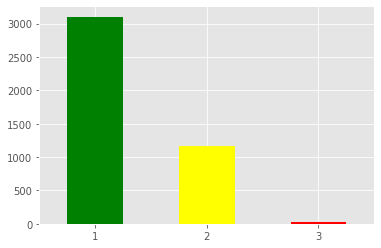

In [ ]:
b.plot(kind='bar',rot=0, color=['Green','Yellow','Red'])